Decimals

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

Read dataset
Statistics on variables

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


Printing dataset dimensions

In [4]:
print(df.shape)

(891, 12)


Printing name of columns

In [5]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Printing information about dataframe

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Change column type with int64

In [4]:
from matplotlib.pylab import int64
df["Fare"] = df["Fare"].astype(int64)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,31.79
std,257.35,0.49,0.84,14.53,1.10,0.81,49.70
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.00


Non-numerical features

In [8]:
df.describe(include=["object", "float64"])

,Name,Sex,Age,Ticket,Cabin,Embarked
count,891,891,714.00,891,204,889
unique,891,2,NaN,681,147,3
top,"Dooley, Mr. Patrick",male,NaN,347082,G6,S
freq,1,577,NaN,7,4,644
mean,NaN,NaN,29.70,NaN,NaN,NaN
std,NaN,NaN,14.53,NaN,NaN,NaN
min,NaN,NaN,0.42,NaN,NaN,NaN
25%,NaN,NaN,20.12,NaN,NaN,NaN
50%,NaN,NaN,28.00,NaN,NaN,NaN
75%,NaN,NaN,38.00,NaN,NaN,NaN


Categorical and boolean features using value_counts

In [9]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Calculate fractions

In [10]:
df["Sex"].value_counts(normalize=True)

Sex
male      0.65
female    0.35
Name: proportion, dtype: float64

missing values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

heatmap for missing variables

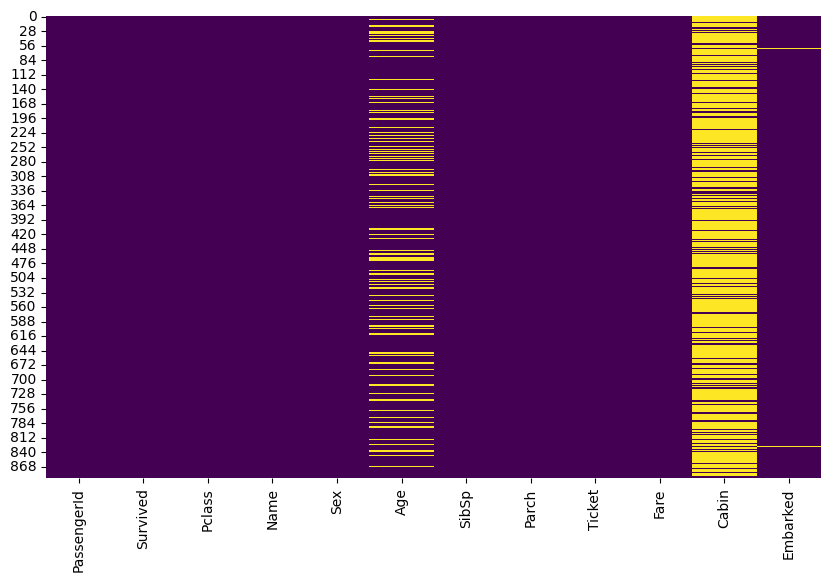

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()

distribution of target variable
check unique values in target variable

In [7]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

visualizing target variable distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24640\1498256011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


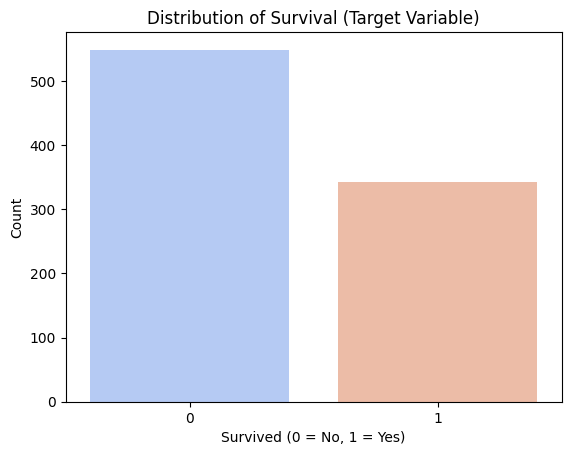

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Distribution of Survival (Target Variable)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

correlation

<Axes: >

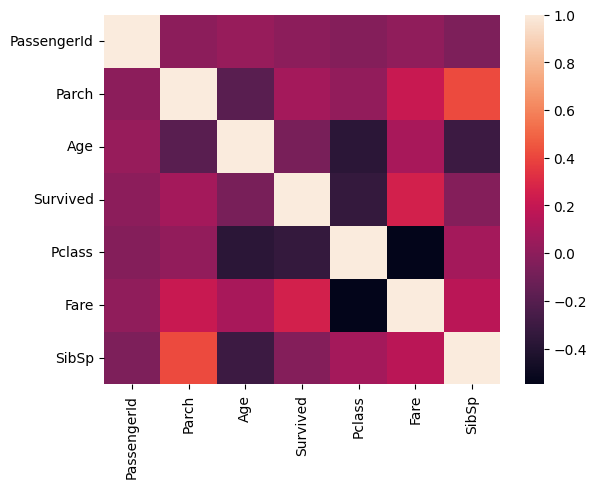

In [22]:
numerical = list(
    set(df.columns)
    - {
        "Name",
        "Sex",
        "Ticket",
        "Cabin",
        "Embarked"
    }
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

Sort by Name

In [11]:
df.sort_values(by="Name", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27,NaN,C
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9,NaN,S


Sort Multiple Columns

In [12]:
df.sort_values(by=["Name", "Age"], ascending=[True, False]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24,NaN,C


Indexing Data

In [13]:
df["Age"].mean()

np.float64(29.69911764705882)

Average daytime

In [14]:
df[df["Age"] == 1]["Age"].mean()

np.float64(1.0)

Maximum Length

In [15]:
df[(df["Survived"] == 0) & (df["Sex"] == "male")]["Age"].max()

np.float64(74.0)

Loc Method

In [16]:
df.loc[0:5, "Survived": "Sex"]

,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,1,3,"Heikkinen, Miss. Laina",female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,0,3,"Allen, Mr. William Henry",male
5,0,3,"Moran, Mr. James",male


iloc Method

In [17]:
df.iloc[2:8, 3:5]

,Name,Sex
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male


Show Last Line of Dataframe

In [18]:
df[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7,NaN,Q


Apply Columns, Rows and Functions

In [19]:
df.apply(np.count_nonzero) 

PassengerId    891
Survived       342
Pclass         891
Name           891
Sex            891
Age            891
SibSp          283
Parch          213
Ticket         891
Fare           876
Cabin          891
Embarked       891
dtype: int64

Apply function in each row

In [20]:
df[df["Ticket"].apply(lambda ticket: ticket[0] == "S")].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41,NaN,C
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8,NaN,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73,NaN,S


Replacing values in Column

In [21]:
d = {0: "False", 1: "True"}
df["Survived"] = df["Survived"].map(d)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


Replace with replace Method

In [22]:
d = {"male": "M", "female": "F"}
df = df.replace({"Sex": d})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53,C123,S
4,5,False,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8,NaN,S


Building contingency table using crosstab method

In [23]:
pd.crosstab(df["Survived"], df["Sex"])

Sex,F,M
Survived,,
False,81,468
True,233,109


Normalization

In [24]:
pd.crosstab(df["Survived"], df["Sex"], normalize=True)

Sex,F,M
Survived,,
False,0.09,0.53
True,0.26,0.12


Defining Pivot Table

In [25]:
df.pivot_table(
    ["Survived", "Parch", "SibSp"],
    ["Age"],
    aggfunc="sum",
)

,Parch,SibSp,Survived
Age,,,
0.42,1,0,True
0.67,1,1,True
0.75,2,4,TrueTrue
0.83,3,1,TrueTrue
0.92,2,1,True
...,...,...,...
70.00,1,1,FalseFalse
70.50,0,0,False
71.00,0,0,FalseFalse


DataFrame Transformation

In [26]:
total = (
    df["Name"]
    + df["Cabin"]
)
df.insert(loc=len(df.columns), column="Sum", value=total)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sum
0,1,False,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7,NaN,S,NaN
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,True,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7,NaN,S,NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
4,5,False,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8,NaN,S,NaN


Same in the other way

In [27]:
df["Total"] = (
    df["Name"]
    + df["Cabin"]
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sum,Total
0,1,False,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7,NaN,S,NaN,NaN
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...","Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,True,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7,NaN,S,NaN,NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123","Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
4,5,False,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8,NaN,S,NaN,NaN


Drop Method

In [28]:
df.drop(["Name", "Age"], axis=1, inplace=True)
df.drop([2,3]).head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sum,Total
0,1,False,3,M,1,0,A/5 21171,7,NaN,S,NaN,NaN
1,2,True,1,F,1,0,PC 17599,71,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...","Cumings, Mrs. John Bradley (Florence Briggs Th..."
4,5,False,3,M,0,0,373450,8,NaN,S,NaN,NaN
5,6,False,3,M,0,0,330877,8,NaN,Q,NaN,NaN
6,7,False,1,M,0,0,17463,51,E46,S,"McCarthy, Mr. Timothy JE46","McCarthy, Mr. Timothy JE46"


CrossTab

In [29]:
pd.crosstab(df["Survived"], df["Sex"], margins=True)

Sex,F,M,All
Survived,,,
False,81,468,549
True,233,109,342
All,314,577,891


Show First Image

<Axes: xlabel='Sex', ylabel='count'>

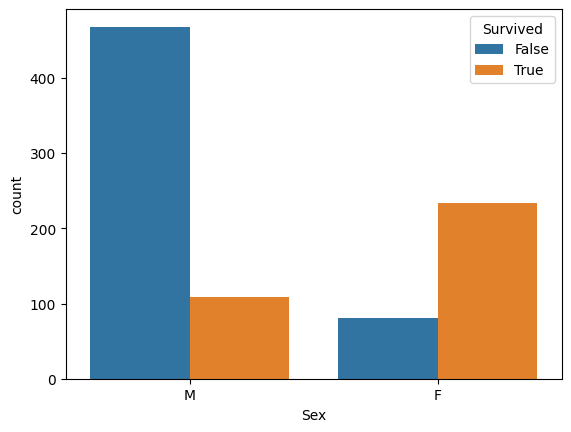

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Sex", hue="Survived", data=df)

Show Second Image

<Axes: xlabel='Sex', ylabel='count'>

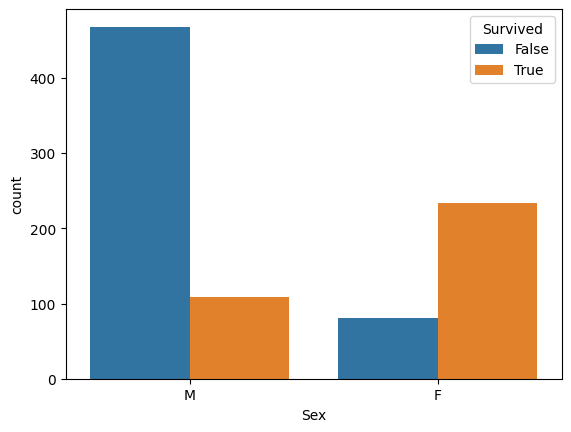

In [31]:
pd.crosstab(df["Survived"], df["Sex"], margins=True)
sns.countplot(x="Sex", hue="Survived", data=df)

Show First Table

In [32]:
pd.crosstab(df["Sex"], df["Survived"], margins=True)

Survived,False,True,All
Sex,,,
F,81,233,314
M,468,109,577
All,549,342,891


Show Third Image

<Axes: xlabel='Sex', ylabel='count'>

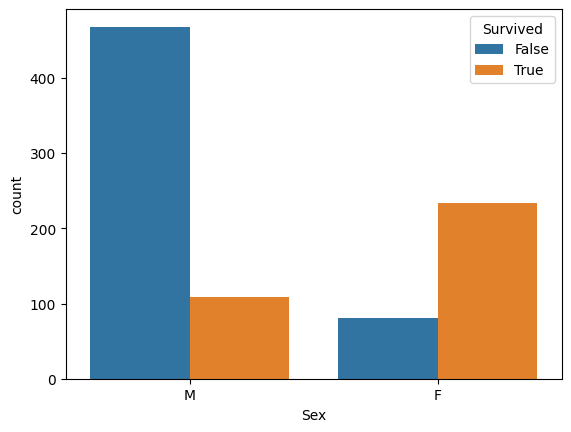

In [33]:
sns.countplot(x="Sex", hue="Survived", data=df)

Show Second Table

In [34]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,False,True
Sex,,
F,81,233
M,468,109
